In [ ]:
#Week 4
#SID: 2305603
#Support Vector Classification
#Small C equals large margin, (Where C = Cost function) - Large C equals small margin (inverse relationship)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


Rows Columns
(887, 8)
   Passenger Class  Female  Male   Age  Siblings/Spouses Aboard  \
0                3       0     1  22.0                        1   
1                1       1     0  38.0                        1   
2                3       1     0  26.0                        0   
3                1       1     0  35.0                        1   
4                3       0     1  35.0                        0   

   Parents/Children Aboard     Fare  Survived  
0                        0   7.2500         0  
1                        0  71.2833         1  
2                        0   7.9250         1  
3                        0  53.1000         1  
4                        0   8.0500         0  

 Survived
0    545
1    342
Name: count, dtype: int64


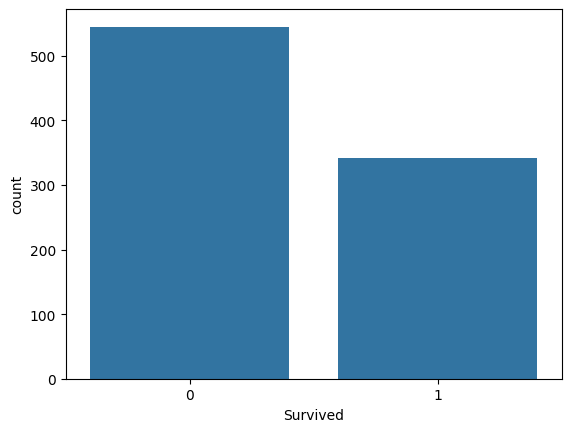

In [2]:
#Read and Display Data Set

#First, read in CSV and assign it to a variable called "data"
data = pd.read_csv("data/titanic.csv")

#Second, display maximum rows and columns
print('\nRows Columns') #Indicates rows and columns
print(data.shape) #gets the number of rows and columns of data set

pd.set_option('display.max_columns', None) #optional setting to show all feature columns

#Third, display first five rows to check data
print(data.head(5))

#Select last column (assuming the last column is the class)
last_column = data.iloc[:, -1] #using iloc to select the last column

#Count occurences of 0's and 1's
value_counts = last_column.value_counts()

#Print the value counts and check for imbalance
print('\n' , value_counts)

sns.countplot(x="Survived", data=data)
plt.show()

Axes(0.125,0.11;0.62x0.77)


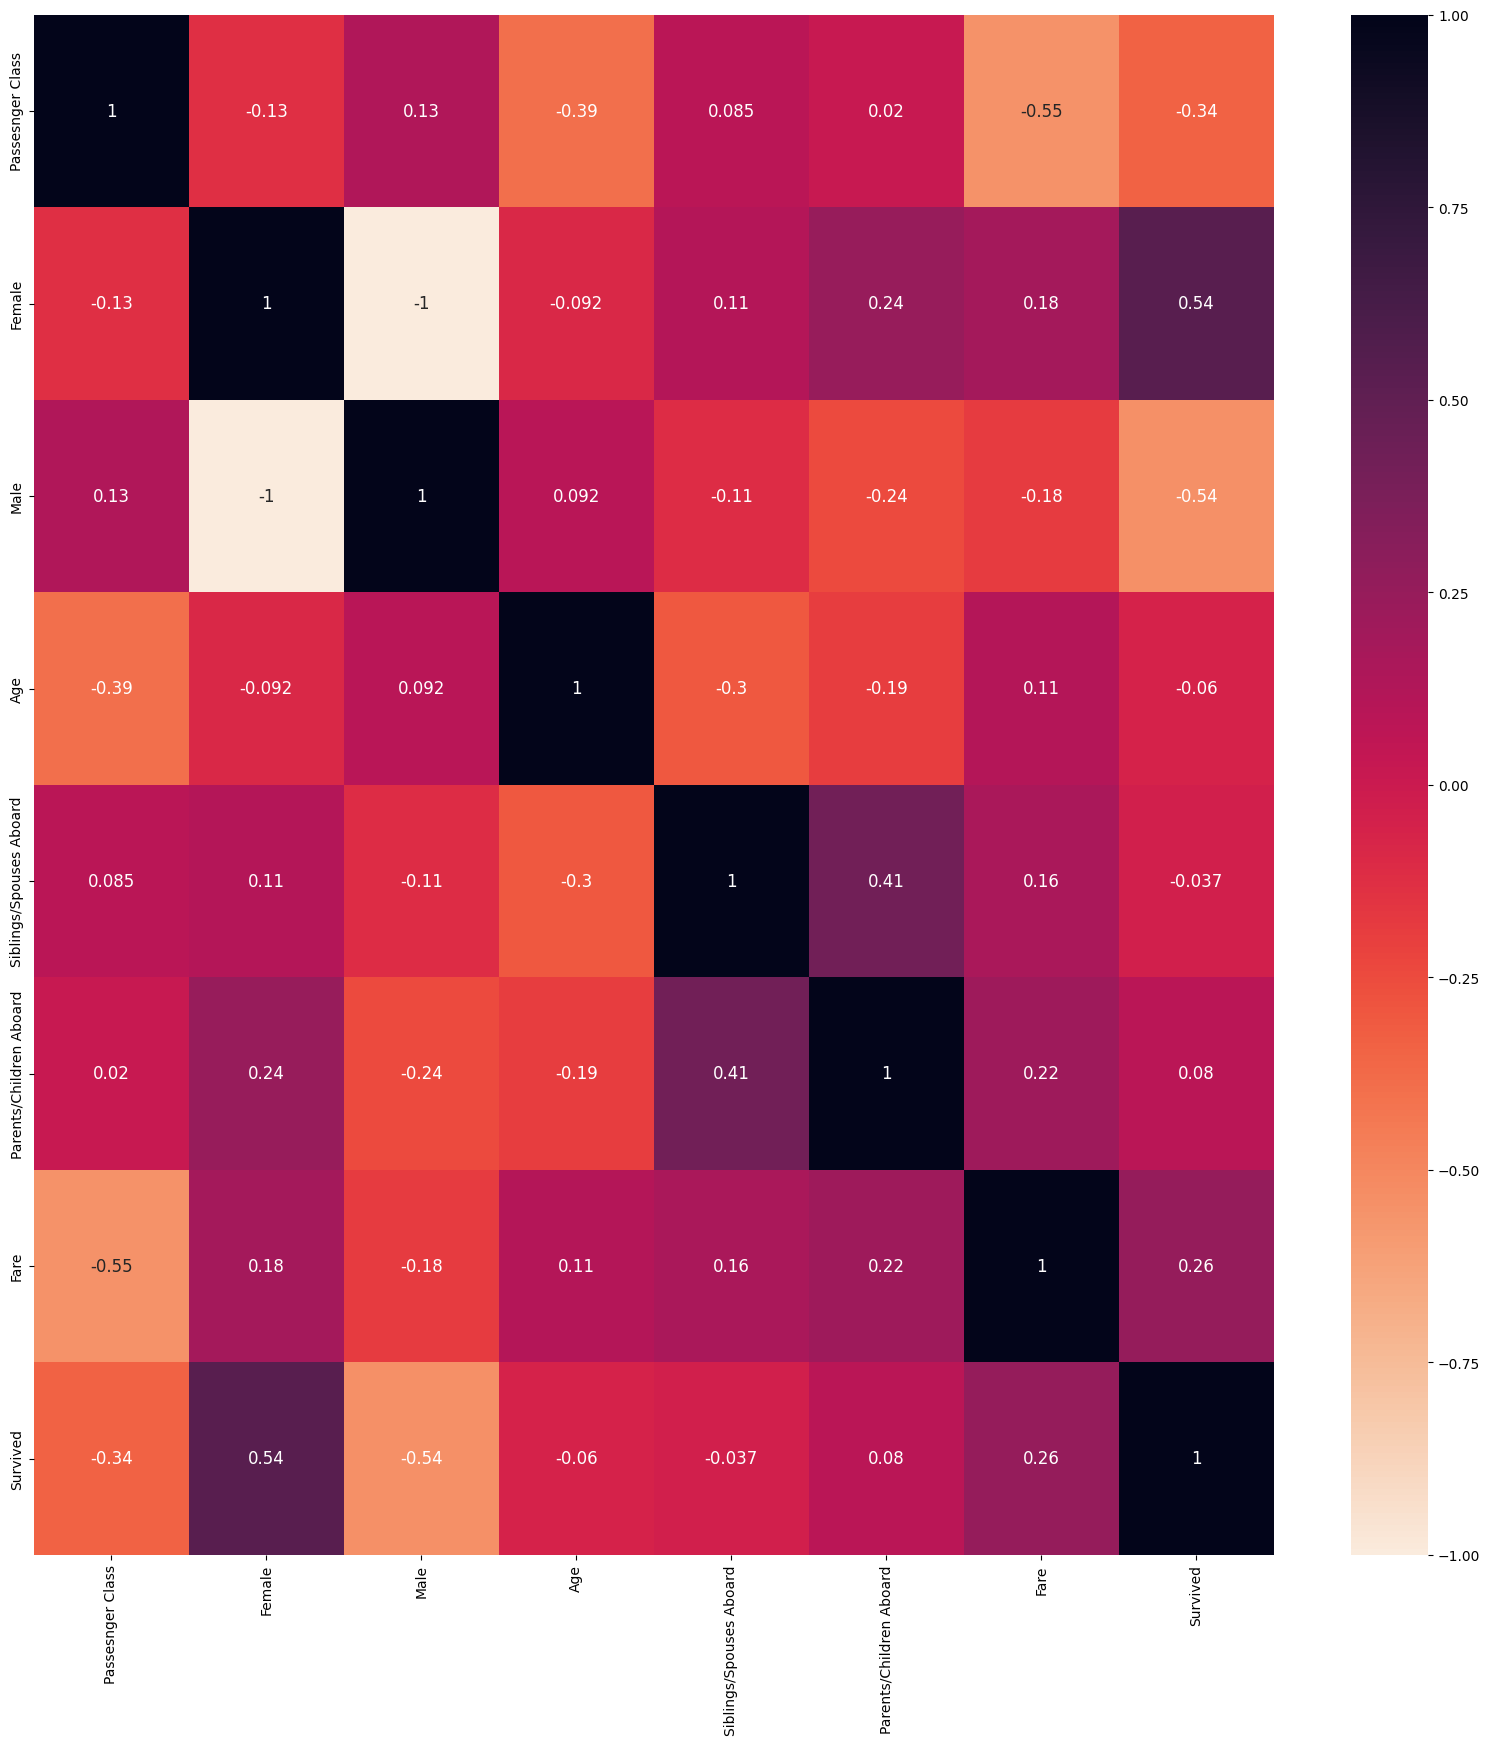

In [6]:
#Display Feature Relations of Data Set
plt.figure(figsize=(20,20)) #Adjust width and height
print(sns.heatmap(data.corr(),annot=True, annot_kws={"size":12}, cmap= sns.cm.rocket_r))

In [7]:
#Declare X and Y Variables and Split the Dataset into Train and Test sections
X=data.drop(['Survived'], axis=1).values #X Variables = all common except the last one

#Declare last column to be the Dependent variable Y
y=data['Survived'].values #Y Variable = last column

#Split Data Set 70% training and 30% Testubg. Initial data shuffle to zero
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=0)

In [8]:
#Optimising the Model for Better Metrics
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3) #'Verbose' = Added information in Grid Search. 1 = Little, 2 = Average, 3 = Full info
grid.fit(X_train, y_train)
grid.best_params_
grid_predictions = grid.predict(X_test)

#Display Metrics
print('\nConfusion Matrix = \n', confusion_matrix(y_test, grid_predictions))
print('\nAccuracy = ', accuracy_score(y_test, grid_predictions))
print('\nPrecision = ', precision_score(y_test, grid_predictions))
print('\nRecall = ', recall_score(y_test, grid_predictions))
print('\nF1 Score = ', f1_score(y_test, grid_predictions))

#Display best paramaters
print('\nOptimised Parameters = ')
print(grid.best_params_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.621 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.621 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.621 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.621 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.621 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.621 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.645 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01